In [19]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [20]:
analysis = scripts.Analysis()

In [21]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_50_T_250',
                          'min_4e-21_max_1e-17_ng_5',
                          'wgt_1_1_1_1_1',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [22]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'n2o',
                               'band07_wn_1215_1380',
                               'P_50_T_250',
                               'min_4e-21_max_1e-17_ng_5',
                               'wgt_1_1_1_1_1',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [23]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [24]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [25]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [26]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [27]:
fig.display_hrefanchor()

In [28]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [29]:
table_dgdgs.display_hrefanchor()

In [30]:
s = 'Table: flux. g-group 1'
html = climahtml.getHTML_hrefanchor(s)
display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

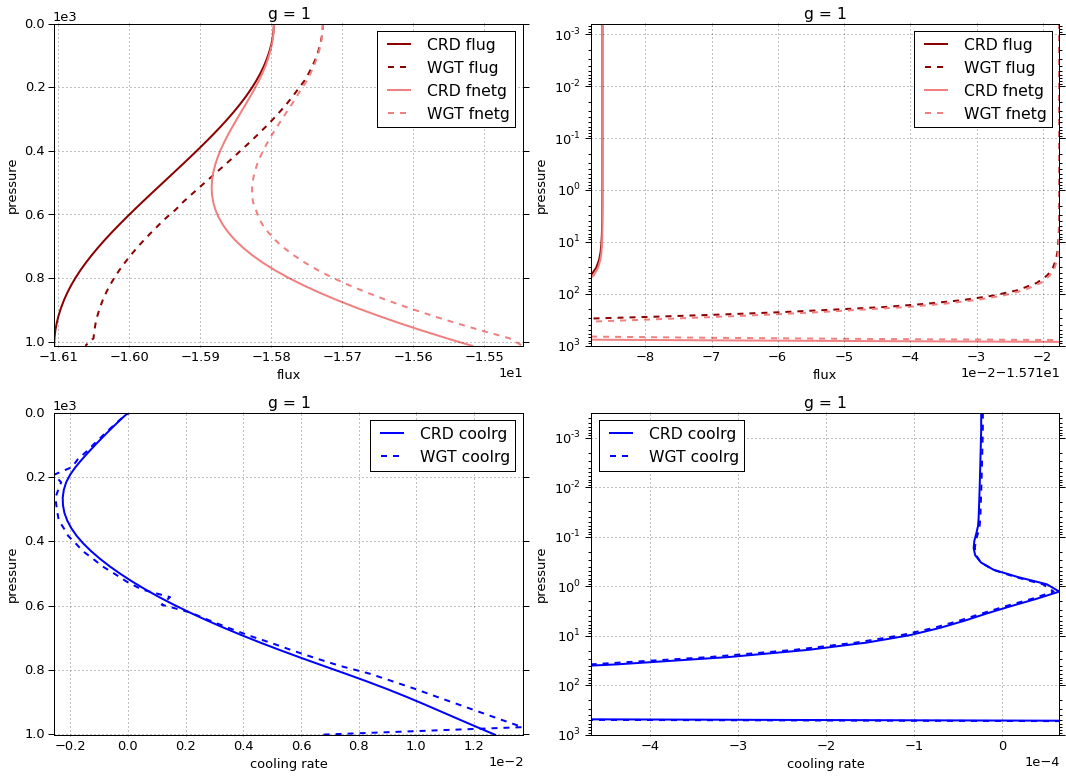

# Figure: flux, cooling rate. g-group 2

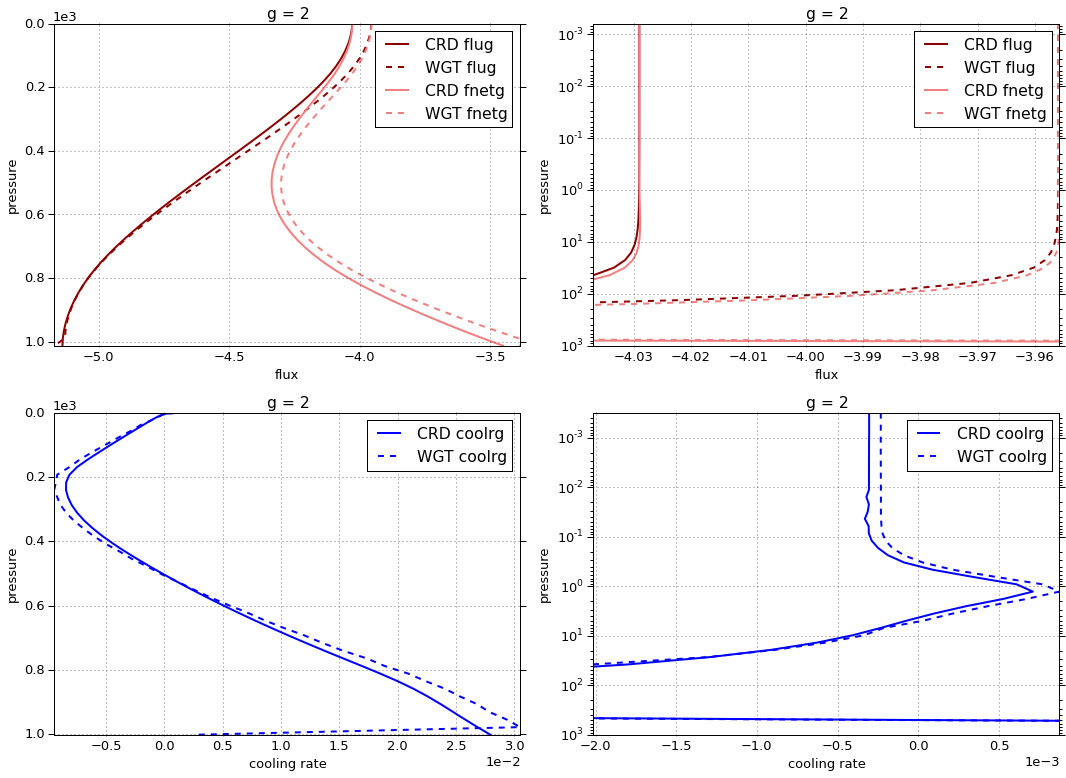

# Figure: flux, cooling rate. g-group 3

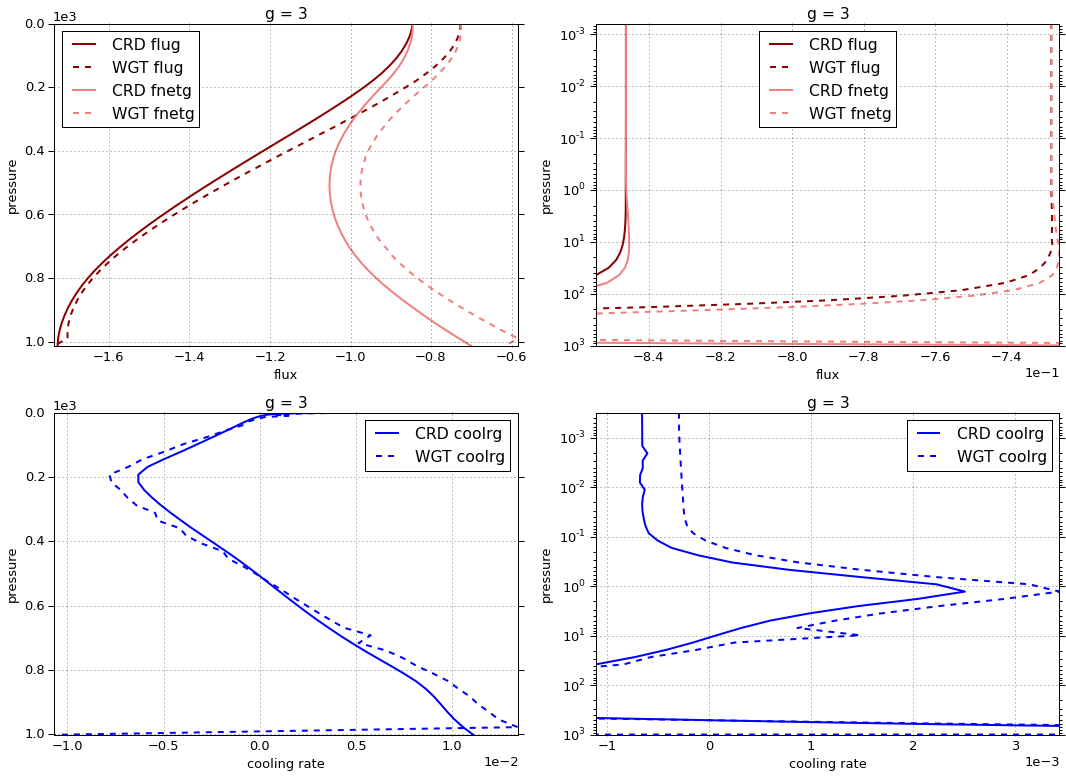

# Figure: flux, cooling rate. g-group 4

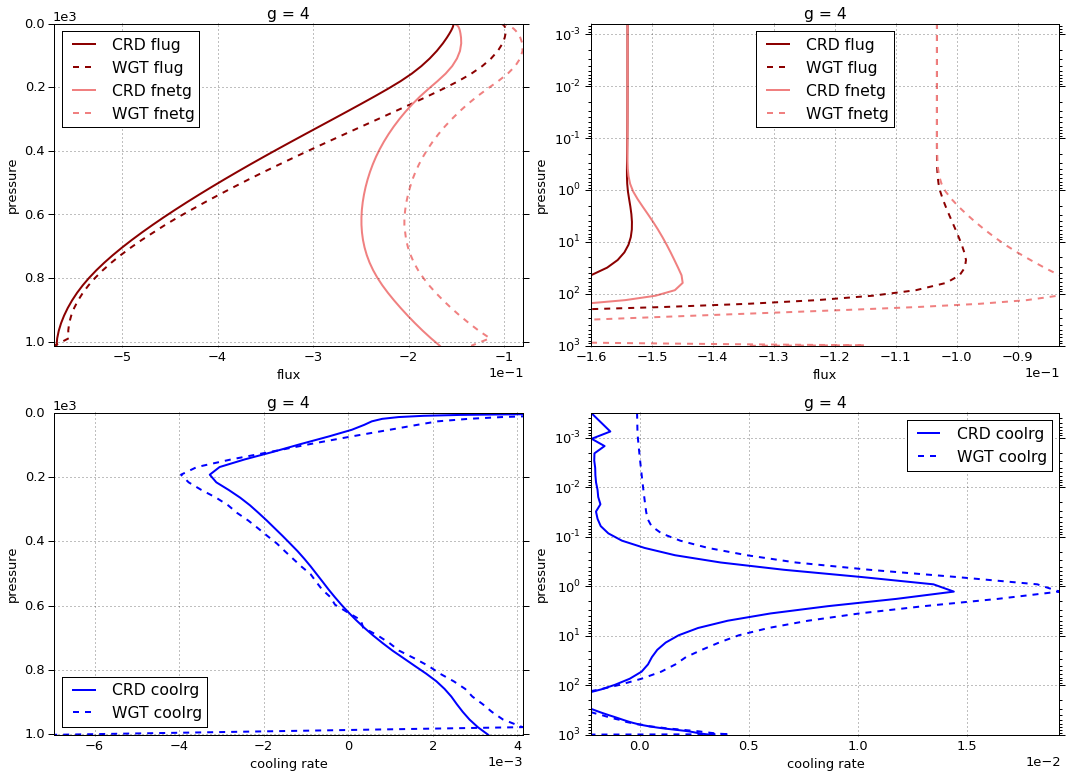

# Figure: flux, cooling rate. g-group 5

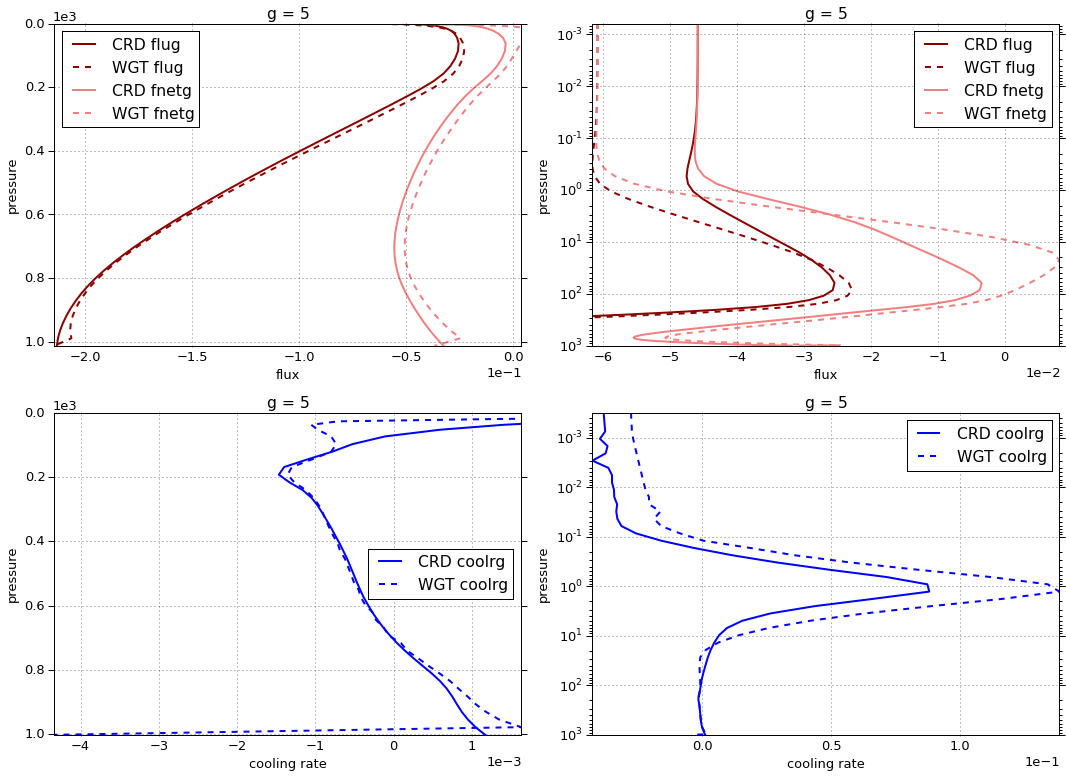

# Figure: flux, cooling rate. g-group total

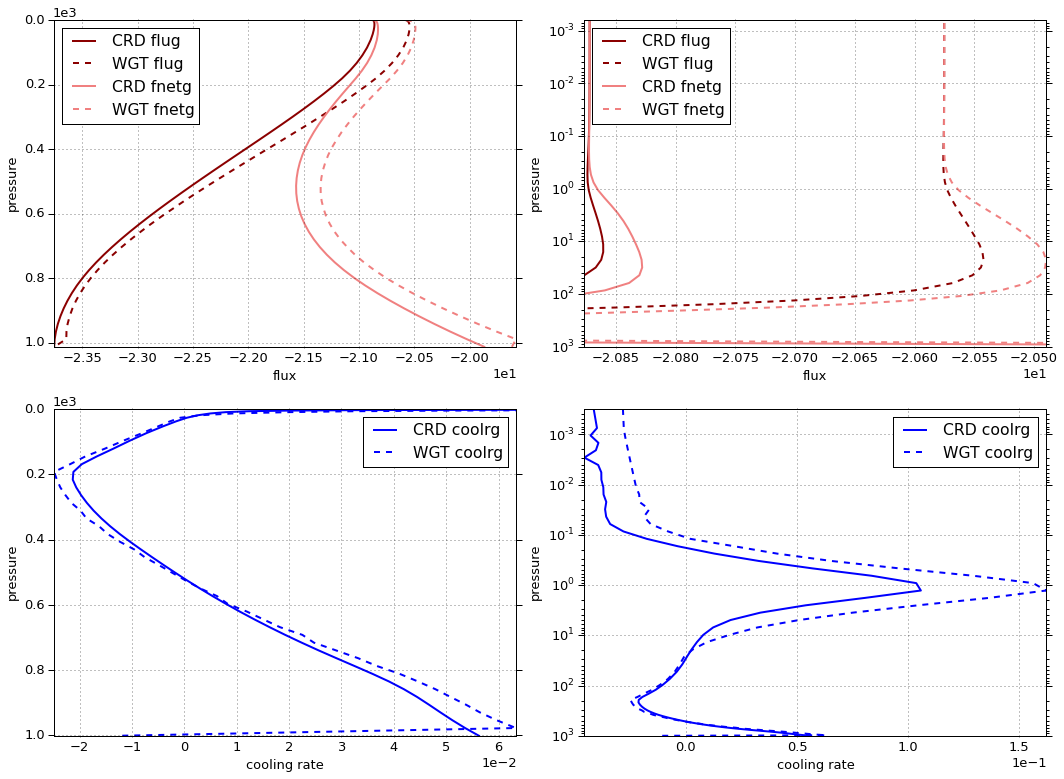

In [31]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [32]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.796510  0.000000 -15.796510
  1013     76    -16.105947  0.588631 -15.517316
2 0        1      -4.029012  0.000000  -4.029012
  1013     76     -5.139632  1.689383  -3.450250
3 0        1      -0.846453  0.000000  -0.846453
  1013     76     -1.727651  1.027208  -0.700443
4 0        1      -0.154066  0.000000  -0.154066
  1013     76     -0.568647  0.401283  -0.167363
5 0        1      -0.045888  0.000000  -0.045888
  1013     76     -0.213294  0.180788  -0.032505


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.727500  0.000000 -15.727500
  1013     76    -16.062046  0.615779 -15.446267
2 0        1      -3.955990  0.000000  -3.955990
  1013     76     -5.171342  1.786109  -3.385233
3 0        1      -0.727644  0.000000  -0.727644
  1013     76     -1.736102  1.121047  -0.615055
4 0        1      -0.103239  0.000000  -0.103239
  1013     76     -0.571108  0.436511  -0.134597
5 0        1      -0.060882  0.000000  -0.060882
  1013     76     -0.214572  0.177856  -0.036716


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.069010  0.000000  0.069010
  1013     76     0.043901  0.027148  0.071049
2 0        1      0.073021  0.000000  0.073021
  1013     76    -0.031710  0.096726  0.065017
3 0        1      0.118810  0.000000  0.118810
  1013     76    -0.008451  0.093839  0.085388
4 0        1      0.050826  0.000000  0.050826
  1013     76    -0.002462  0.035228  0.032766
5 0        1     -0.014994  0.000000 -0.014994
  1013     76    -0.001279 -0.002932 -0.004211

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000024
  1001.112500 75     0.012727
2 0.000312    1     -0.000305
  1001.112500 75     0.027955
3 0.000312    1     -0.000655
  1001.112500 75     0.011083
4 0.000312    1     -0.002232
  1001.112500 75     0.003319
5 0.000312    1     -0.038260
  1001.112500 75     0.001169


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000022
  1001.112500 75     0.006587
2 0.000312    1     -0.000233
  1001.112500 75     0.002466
3 0.000312    1     -0.000294
  1001.112500 75    -0.010679
4 0.000312    1     -0.000119
  1001.112500 75    -0.006965
5 0.000312    1     -0.027637
  1001.112500 75    -0.004339


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1      0.000002
  1001.112500 75    -0.006140
2 0.000312    1      0.000072
  1001.112500 75    -0.025489
3 0.000312    1      0.000361
  1001.112500 75    -0.021761
4 0.000312    1      0.002113
  1001.112500 75    -0.010284
5 0.000312    1      0.010624
  1001.112500 75    -0.005509

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.871928,0.000000,-20.871928
1013,76,-23.755170,3.887293,-19.867877



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.575255,0.000000,-20.575255
1013,76,-23.755171,4.137302,-19.617869



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,2.966730e-01,0.000000,0.296673
1013,76,-2.000000e-07,0.250009,0.250009


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.041477
1001.112500,75,0.056253



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.028305
1001.112500,75,-0.012930



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.013172
1001.112500,75,-0.069183


In [33]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.686545,0.676149
2,0.210364,0.217693
3,0.070970,0.073083
4,0.023394,0.024041
5,0.008727,0.009033


In [34]:
s = 'Table: flux. g-group 1'
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=1).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                                           wgt        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -15.796510  0.000000e+00 -15.796510   1     1   
0.000624      1     2 -15.796510  1.953983e-10 -15.796510   1     2   
0.000876      1     3 -15.796510  2.755937e-10 -15.796510   1     3   
0.001229      1     4 -15.796510  3.913543e-10 -15.796510   1     4   
0.001723      1     5 -15.796510  5.595191e-10 -15.796510   1     5   
0.002417      1     6 -15.796510  8.038682e-10 -15.796510   1     6   
0.003391      1     7 -15.796510  1.158996e-09 -15.796510   1     7   
0.004757      1     8 -15.796510  1.675219e-09 -15.796510   1     8   
0.006672      1     9 -15.796510  2.425735e-09 -15.796510   1     9   
0.009359      1    10 -15.796510  3.517246e-09 -15.796510   1    10   
0.013128      1    11 -15.796510  5.105346e-09 -15.796510   1    11   
0.018415      1    12 -15.796510  7.417370e-09 -15.796510   1    12   
0.025830      1    13 -15.796510  1.078610e-08 -15.796510   1    13   
0.036232      1    14 -15.796510  1.570166e-08 -15.796510   1    14   
0.050823      1    15 -15.796510  2.296533e-08 -15.796510   1    15   
0.071291      1    16 -15.796510  3.456670e-08 -15.796510   1    16   
0.100000      1    17 -15.796510  5.630536e-08 -15.796510   1    17   
0.140271      1    18 -15.796510  1.020335e-07 -15.796510   1    18   
0.196760      1    19 -15.796511  2.007248e-07 -15.796510   1    19   
0.275997      1    20 -15.796511  4.145407e-07 -15.796511   1    20   
0.387100      1    21 -15.796512  8.783043e-07 -15.796511   1    21   
0.543100      1    22 -15.796513  1.885214e-06 -15.796511   1    22   
0.761700      1    23 -15.796515  4.038922e-06 -15.796511   1    23   
1.068500      1    24 -15.796517  8.225831e-06 -15.796509   1    24   
1.498800      1    25 -15.796520  1.470217e-05 -15.796505   1    25   
2.102400      1    26 -15.796525  2.254396e-05 -15.796503   1    26   
2.949000      1    27 -15.796533  3.161654e-05 -15.796502   1    27   
4.136600      1    28 -15.796546  4.236043e-05 -15.796504   1    28   
5.802500      1    29 -15.796568  5.575771e-05 -15.796513   1    29   
8.139200      1    30 -15.796606  7.353508e-05 -15.796532   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -15.871383  1.670665e-02 -15.854676   1    47   
347.300000    1    48 -15.881517  2.093511e-02 -15.860582   1    48   
371.075000    1    49 -15.892020  2.593083e-02 -15.866089   1    49   
394.850000    1    50 -15.902830  3.175487e-02 -15.871075   1    50   
418.625000    1    51 -15.913880  3.846822e-02 -15.875412   1    51   
442.400000    1    52 -15.925109  4.612354e-02 -15.878985   1    52   
466.175000    1    53 -15.936458  5.476417e-02 -15.881694   1    53   
489.950000    1    54 -15.947872  6.443542e-02 -15.883436   1    54   
513.725000    1    55 -15.959294  7.517667e-02 -15.884118   1    55   
537.500000    1    56 -15.970669  8.702325e-02 -15.883646   1    56   
561.275000    1    57 -15.981941  1.000132e-01 -15.881928   1    57   
585.050000    1    58 -15.993051  1.141826e-01 -15.878868   1    58   
608.825000    1    59 -16.003941  1.295687e-01 -15.874372   1    59   
632.600000    1    60 -16.014550  1.462027e-01 -15.868347   1    60   
656.375000    1    61 -16.024819  1.641161e-01 -15.860703   1    61   
680.150000    1    62 -16.034685  1.833366e-01 -15.851349   1    62   
703.925000    1    63 -16.044088  2.038876e-01 -15.840200   1    63   
727.700000    1    64 -16.052964  2.257921e-01 -15.827172   1    64   
751.475000    1    65 -16.061254  2.490728e-01 -15.812181   1    65   
775.250000    1    66 -16.068899  2.737445e-01 -15.795154   1    66   
799.025000    1    67 -16.075848  2.998089e-01 -15.776040   1    67   
822.800000    1    68 -16.082066  3.272490e-01 -15.754817   1    68   
846.575000    1    69 -16.087543  3.

In [35]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')